# 第4章: 形態素解析
---
夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

## 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
!head neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。


In [16]:
%%file q30.py
import argparse
from itertools import groupby
from pprint import pprint
import sys


def main():
    parser = argparse.ArgumentParser()
    parser.add_argument('number', type=int)
    args = parser.parse_args()
    for i, sent_lis in enumerate(read_mecab(sys.stdin)):
        if i == args.number:
            pprint(sent_lis)

            
def read_mecab(fi):
    def sent2inf(sent):
        sent_lis = []
        lappend = sent_lis.append
        exceptions = {',', '"', "'", '.'} # 基本形がおかしくなる
        for line in sent:
            line_dic = {}
            surface, right = line.rstrip().split('\t')
            inf = right.split(',')
            line_dic['surface'] = surface
            line_dic['pos'] = inf[0]
            line_dic['pos1'] = inf[1]
            if surface in exceptions:
                line_dic['base'] = surface
            else:
                line_dic['base'] = inf[6]
            lappend(line_dic)
        return sent_lis
    
    
    for is_eos, sentence in groupby(fi, lambda s: s.startswith('EOS')):
        if not is_eos:
            yield sent2inf(sentence)

            
if __name__ == '__main__':
    main()

# ,の基本形は"
# "の基本形は*
# .の基本形も*
# *の基本形も*
# 'の基本形は'"'

Overwriting q30.py


In [14]:
!python q30.py 1 < neko.txt.mecab

[{'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
 {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
 {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
 {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}]


In [15]:
!echo 吾輩は,猫だ. | mecab | python q30.py 0

[{'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': ',', 'pos': '名詞', 'pos1': 'サ変接続', 'surface': ','},
 {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
 {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'だ'},
 {'base': '.', 'pos': '名詞', 'pos1': 'サ変接続', 'surface': '.'}]


### Pandas

In [1]:
import pandas as pd
df = pd.read_table('neko.txt.mecab', header=None,
                 names=['surface', 'info'],
                 na_values=['EOS']).dropna()
sp = df['info'].str.split(',', expand=True).loc[:, [0, 1, 6]]
sp.columns = ['pos', 'pos1', 'base']
df = pd.concat([df, sp], axis=1)
del df['info']
df.head()

,surface,pos,pos1,base
0,一,名詞,数,一
3,,記号,空白,
4,吾輩,名詞,代名詞,吾輩
5,は,助詞,係助詞,は
6,猫,名詞,一般,猫


## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [89]:
%%file q31.py
import sys

from q30 import read_mecab


def main():
    for sent_lis in read_mecab(sys.stdin):
        for word in sent_lis:
            if word['pos'] == '動詞':
                print(word['surface'])

                
if __name__ == '__main__':
    main()


Overwriting q31.py


In [33]:
!python q31.py < neko.txt.mecab

生れ
つか
し
泣い
し
いる
始め
見
聞く
捕え
煮
食う
思わ
載せ
られ
持ち上げ
られ
し
あっ
落ちつい
見
見
思っ
残っ
いる
さ
れ
し
逢っ
出会わ
し
のみ
なら
し
いる
吹く
せ
弱っ
飲む
知っ
坐っ
おっ
する
し
始め
動く
動く
分ら
廻る
なる
助から
思っ
いる
さり
し
出
し
いる
考え出そ
分ら
付い
見る
い
おっ
見え
隠し
しまっ
違っ
明い
い
られ
這い出し
見る
棄て
られ
這い出す
ある
坐っ
し
考え
見
出
し
泣い
来
くれる
考え付い
やっ
見
来
渡っ
かかる
減っ
来
泣き
出
ある
ある
し
そろ
廻り
始め
し
這っ
行く
出
這入っ
なる
思っ
崩れ
もぐり込ん
破れ
い
し
知れ
云っ
至る
する
なっ
いる
忍び込ん
分ら
なる
減る
降っ
来る
出来
なっ
あるい
行く
考える
這入っ
おっ
見る
し
逢っ
見る
つかん
抛り出し
思っ
ねぶっ
任せ
い
出来
見
這い
上っ
投げ出さ
れ
投げ出さ
れ
這い
上り
這い
上っ
投げ出さ
れ
繰り返し
し
いる
云う
なっ
し
やっ
下り
つまみ出さ
れよ
し
いい
出
来
ぶら下げ
向け
出し
出し
上っ
来
困り
いう
撚り
眺め
おっ
置い
やれ
這入っ
しまっ
聞か
見え
抛り出し
極める
し
合せる
帰る
這入っ
出
来る
思っ
いる
見せ
いる
いう
覗い
見る
し
いる
ある
読みかけ
ある
たらし
いる
帯び
あらわし
いる
食う
食っ
飲む
飲ん
ひろげる
読む
なる
垂らす
繰り返す
考える
ある
生れ
なる
限る
寝
い
勤まる
出来
云わ
せる
来る
鳴らし
いる
住み込ん
行っ
跳ね
付け
られ
し
くれ
さ
れ
至る
つけ
くれ
分る
出来
得る
入れ
くれ
いる
つとめ
読む
乗る
する
乗る
構い
やむを得ん
寝る
し
入っ
もぐり込ん
ねる
なる
入っ
寝る
見出し
割り込む
醒ます
なる
来
来
いっ
泣き
出す
さまし
飛び出し
くる
叩か
れ
し
すれ
する
せ
得
なっ
する
至っ
し
かぶせ
抛り出し
押し込ん
する
しよ
追い廻し
加える
磨い
怒っ
入れ
え
い
する
逢う
言っ
産まれ
持っ
行っ
棄て
来たそ
流し
話し
する
戦っ
せ
なら
いわ
れ
思う
隣り
解し
い
いっ
し


### Pandas

In [34]:
df[df.pos == '動詞'].surface

21          生れ
27          つか
35           し
40          泣い
46           し
48          いる
55          始め
61           見
68          聞く
96          捕え
98           煮
100         食う
121         思わ
131         載せ
132         られ
136       持ち上げ
137         られ
142          し
146         あっ
158       落ちつい
164          見
173          見
187         思っ
193         残っ
195         いる
203          さ
204          れ
211          し
223         逢っ
234        出会わ
          ... 
216109      求め
216111     苦しん
216115      好ん
216119      罹っ
216121      いる
216127      いる
216133      よそ
216139      する
216149      蒙る
216168      任せ
216171       し
216175       し
216184      なっ
216186      くる
216199      つか
216207      いる
216216      いる
216222       し
216229       い
216248      感じ
216249       得
216255    切り落し
216261       し
216267      入る
216272      死ぬ
216275      死ん
216280      得る
216285      死な
216288       得
216289      られ
Name: surface, dtype: object

## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [90]:
%%file q32.py
import sys

from q30 import read_mecab


def main():
    for sent_lis in read_mecab(sys.stdin):
        for word in sent_lis:
            if word['pos'] == '動詞':
                print(word['base'])

                
if __name__ == '__main__':
    main()


Overwriting q32.py


In [41]:
!python q32.py < neko.txt.mecab

生れる
つく
する
泣く
する
いる
始める
見る
聞く
捕える
煮る
食う
思う
載せる
られる
持ち上げる
られる
する
ある
落ちつく
見る
見る
思う
残る
いる
する
れる
する
逢う
出会う
する
のむ
なる
する
いる
吹く
する
弱る
飲む
知る
坐る
おる
する
する
始める
動く
動く
分る
廻る
なる
助かる
思う
いる
さる
する
出る
する
いる
考え出す
分る
付く
見る
いる
おる
見える
隠す
しまう
違う
明く
いる
られる
這い出す
見る
棄てる
られる
這い出す
ある
坐る
する
考える
見る
出る
する
泣く
来る
くれる
考え付く
やる
見る
来る
渡る
かかる
減る
来る
泣く
出る
ある
ある
する
そる
廻る
始める
する
這う
行く
出る
這入る
なる
思う
崩れる
もぐり込む
破れる
いる
する
知れる
云う
至る
する
なる
いる
忍び込む
分る
なる
減る
降る
来る
出来る
なる
あるく
行く
考える
這入る
おる
見る
する
逢う
見る
つかむ
抛り出す
思う
ねぶる
任せる
いる
出来る
見る
這う
上る
投げ出す
れる
投げ出す
れる
這う
上る
這う
上る
投げ出す
れる
繰り返す
する
いる
云う
なる
する
やる
下りる
つまみ出す
れる
する
いう
出る
来る
ぶら下げる
向ける
出す
出す
上る
来る
困る
いう
撚る
眺める
おる
置く
やる
這入る
しまう
聞く
見える
抛り出す
極める
する
合せる
帰る
這入る
出る
来る
思う
いる
見せる
いる
いう
覗く
見る
する
いる
ある
読みかける
ある
たらす
いる
帯びる
あらわす
いる
食う
食う
飲む
飲む
ひろげる
読む
なる
垂らす
繰り返す
考える
ある
生れる
なる
限る
寝る
いる
勤まる
出来る
云う
せる
来る
鳴らす
いる
住み込む
行く
跳ねる
付ける
られる
する
くれる
する
れる
至る
つける
くれる
分る
出来る
得る
入れる
くれる
いる
つとめる
読む
乗る
する
乗る
構う
やむを得る
寝る
する
入る
もぐり込む
ねる
なる
入る
寝る
見出す
割り込む
醒ます
なる
来る
来る
いう
泣く
出す
さます
飛び出す
くる
叩く
れる
する
する
する
する
得る
なる
する
至る
する
かぶせる


### Pandas

In [39]:
df[df.pos == '動詞'].base

21          生れる
27           つく
35           する
40           泣く
46           する
48           いる
55          始める
61           見る
68           聞く
96          捕える
98           煮る
100          食う
121          思う
131         載せる
132         られる
136       持ち上げる
137         られる
142          する
146          ある
158        落ちつく
164          見る
173          見る
187          思う
193          残る
195          いる
203          する
204          れる
211          する
223          逢う
234         出会う
          ...  
216109      求める
216111      苦しむ
216115       好む
216119       罹る
216121       いる
216127       いる
216133       よす
216139       する
216149       蒙る
216168      任せる
216171       する
216175       する
216184       なる
216186       くる
216199       つく
216207       いる
216216       いる
216222       する
216229       いる
216248      感じる
216249       得る
216255     切り落す
216261       する
216267       入る
216272       死ぬ
216275       死ぬ
216280       得る
216285       死ぬ
216288       得る
216289      られる
Name: base, dtype: objec

## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [91]:
%%file q33.py
import sys

from q30 import read_mecab


def main():
    for sent_lis in read_mecab(sys.stdin):
        for word in sent_lis:
            if word['pos1'] == 'サ変接続' and word['pos'] == '名詞':
                print(word['base'])

                
if __name__ == '__main__':
    main()


Overwriting q33.py


In [43]:
!python q33.py < neko.txt.mecab

見当
記憶
話
装飾
突起
運転
記憶
分別
決心
我慢
餓死
訪問
始末
猶予
遭遇
我慢
記憶
返報
勉強
勉強
昼寝
珍重
昼寝
経験
供
供
供
供
*

*

同居
観察
断言
同衾
供
迫害
尊敬
生活
剿滅
議論
所有
憤慨
観念
御馳走
掠奪
代言
我儘
我儘
失敗
話
投書
関
決心
昼寝
鑑定
話
述懐
想像
写生
感心
昼寝
失笑
揶揄
写生
欠伸
自白
彩色
写生
判然
心中
感服
小便
猶予
失敬
欠伸
予定
失望
漫罵
小便
増長
増長
我儘
我慢
報道
供
昼寝
退屈
加減
一睡
運動
嘆賞
佇立
記憶
珍重
身動き
挨拶
鼓動
軽蔑
察
肥満
御馳走
乱暴
教育
交際
同盟
敬遠
軽侮
問答
御馳走
邂逅
邂逅
相当
雑談
自慢
質問
発達
比較
覚悟
自慢
感心
謹聴
呼吸
弁護
思案
吶喊
掃除
感心
喝采
質問
反対
呈出
大息
*

加減
決心
御馳走
御馳走
要心
放蕩
放蕩
放蕩
放蕩
放蕩
放蕩
自任
放蕩
卒業
関
料理
首肯
批評
関
訪問
忠告
写生
写生
変化
写生
主張
発達
感心
感服
捏造
話
喜悦
対話
想像
加減
顧慮
挑撥
忠告
著述
出版
記憶
演説
傍聴
傾聴
話
注意
写生
相違
降参
写生
注意
消沈
紅葉
昼寝
供
感心
御馳走
感服
動揺
感服
苦心
相違
判然
苦心
属
浴
軽侮
評価
製造
差別
応用
按排
加減
判然
区別
存
向上
識別
発達
同情
達観
達観
征
行列
勉強
一見
意味
尊敬
存在
外出
卒業
合点
談話
御無沙汰
活動
左右
自慢
合奏
挺
伴奏
挺
勘定
往来
恋着
諷刺
感心
失恋
関係
心配
返事
加減
散歩
陥落
決心
来着
失恋
失敬
頂戴
頂戴
間食
留守
失敬
頂戴
頂戴
失敬
仕付
吹聴
供
分配
らく
附加
見物
歩行
拝見
我儘
承知
返事
病気
注意
散歩
*

旅
下落
成道
慰安
冷笑
見当
発揮
属
保存
晩酌
攻撃
喧嘩
是非
忠告
因
本復
按腹
療治
根治
按摩
治療
位置
顛倒
根治
昏睡
閉口
是非
呼吸
運動
廃
変化
持
心配
病気
議論
研究
反駁
学問
弁解
見当
挨拶
晩酌
影響
遠征
供
経験
我儘
*

散歩
苦心
往来
歩行
探険
裁縫
*

探険
話
膠着
白状
ねばねば
供
感得
熟視
供
催促
焦慮
始

### Pandas

In [44]:
df.query('pos1 == "サ変接続" and pos == "名詞"').surface

25        見当
45        記憶
102        話
202       装飾
250       突起
325       運転
385       記憶
547       分別
643       決心
668       我慢
738       餓死
777       訪問
825       始末
830       猶予
894       遭遇
974       我慢
1032      記憶
1062      返報
1286      勉強
1297      勉強
1343      昼寝
1581      珍重
1652      昼寝
1692      経験
1738       供
1754       供
1811       供
1829       供
1831      ——
1839      ——
          ..
214413    吃驚
214455    出張
214469    対面
214474    挨拶
214493    我慢
214555    出現
214573    頂戴
214578     有
214581    帰臥
214665    自殺
214667     帰
214673    油断
215091    解決
215153    決心
215187    我慢
215189    我慢
215224    圧迫
215432    挨拶
215466    散歩
215483    加減
215508    判然
215542    ろか
215569    ——
215741    行水
215746    行水
215788    行水
216117    拷問
216170    抵抗
216197    見当
216221    判然
Name: surface, dtype: object

## 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [92]:
%%file q34.py
import sys

from q30 import read_mecab


def main():
    for sent_lis in read_mecab(sys.stdin):
        for i in range(len(sent_lis) - 2):
            if (sent_lis[i+1]['base'] == 'の' and sent_lis[i]['pos'] == '名詞'
                and sent_lis[i+2]['pos'] == '名詞'):
                print(''.join([sent_lis[i+x]['surface'] for x in range(3)]))

                
if __name__ == '__main__':
    main()


Overwriting q34.py


In [72]:
!python q34.py < neko.txt.mecab

彼の掌
掌の上
書生の顔
はずの顔
顔の真中
穴の中
書生の掌
掌の裏
何の事
肝心の母親
藁の上
笹原の中
池の前
池の上
一樹の蔭
垣根の穴
隣家の三
時の通路
一刻の猶予
家の内
彼の書生
以外の人間
前の書生
おさんの隙
おさんの三
胸の痞
家の主人
主人の方
鼻の下
吾輩の顔
自分の住
吾輩の主人
家のもの
うちのもの
彼の書斎
本の上
皮膚の色
本の上
彼の毎夜
以外のもの
主人の傍
彼の膝
膝の上
経験の上
飯櫃の上
炬燵の上
ここのうち
供の寝床
彼等の中間
供の一
例の神経
性の主人
次の部屋
自分の勝手
吾輩の方
台所の板の間
吾輩の尊敬
向の白
玉のよう
そこの家
家の書生
裏の池
親子の愛
もっともの議論
刺の頭
鰡の臍
彼等のため
軍人の家
代言の主人
教師の家
猫の時節
吾輩の家
家の主人
だらけの英文
胃弱の癖
後架の中
平の宗
月の月給
当分の間
下のよう
今更のよう
主人の述懐
彼の友
金縁の眼鏡
主人の顔
内の想像
訳のもの
利の大家
金縁の裏
吾輩の後ろ
彼の友
吾輩の輪廓
顔のあたり
上乗の出来
顔の造作
他の猫
不器量の吾輩
吾輩の主人
斯産の猫
斑入りの皮膚
主人の彩色
一種の色
身内の筋肉
主人の予定
座敷の中
悪口の言いよう
人の気
彼の背中
こっちの便利
自己の力量
人間の不徳
吾輩の家
家の裏
浩然の気
小春の穏
日の二
茶の木の根
西側の杉
垣のそば
他の庭
純粋の黒
彼の皮膚
皮膚の上
毛の間
中の大王
吾輩の倍
嘆賞の念
好奇の心
彼の前
小春の風
垣の上
梧桐の枝
枚の葉
枯菊の茂み
真丸の眼
人間の珍重
双眸の奥
吾輩の矮小
額の上
声の底
吾輩の心臓
ここの教師
教師の家
良家の猫
車屋の黒
車屋の黒
主義の的
彼の名
軽侮の念
左の問答
車屋の方
うちの主人
車屋の猫
どこの国
己の後
教師の方
車屋の黒
相当の気焔
畠の中
黒の比較
彼の鼻
鼻の先
彼の気焔
自分の手柄
墻壁の欠
彼の答
鼠の百
掃除の時
うちの亭主
石灰の袋
椽の下
たちの野郎
溝の中
去年の臭気
鼻の頭
反対の結果
うちの亭主
己の御蔭
無学の黒
背中の毛
黒の子分
以外の御馳走
教師の家
教師のよう
吾輩の主人
日の日記
今日の会
質の人
人の妻君
連中のうち
吾輩の水彩
屋の酒
一廉の水彩
吾輩の水彩
野暮の方
芸者の妻君


## 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [67]:
%%file q35.py
import sys
from itertools import groupby

from q30 import read_mecab


def main():
    for sent_lis in read_mecab(sys.stdin):
        for key, group in groupby(sent_lis, lambda word: word['pos']):
            if key == '名詞':
                words = [word['surface'] for word in group]
                if len(words) > 1:
                    print(''.join(words))

                
if __name__ == '__main__':
    main()


Overwriting q35.py


In [68]:
!python q35.py < neko.txt.mecab

人間中
一番獰悪
時妙
一毛
その後猫
一度
ぷうぷうと煙
邸内
三毛
書生以外
四五遍
この間おさん
三馬
御台所
まま奥
住家
終日書斎
勉強家
勉強家
勤勉家
二三ページ
主人以外
限り吾輩
朝主人
一番心持
二人
一つ床
一人
最後大変
——猫
神経胃弱性
物指
尻ぺたをひどく
言語同断
家内総がかり
筋向
白君
度毎
白君
先日玉
四疋
三日目
四疋
白君
我等猫族
家族的生活
三毛君
所有権
我々同族間
目刺
一番先
彼等人間
我等
吾人
白君
三毛君
間違いだらけ
後架先生
宗盛
宗盛
月給日
水彩絵具
毎日毎日書斎
人の
自ら筆
眼鏡越
一室内
以太利
大家アンドレア・デル・サルト
露華
寒鴉
これ一幅
活画
翌日吾輩
一分
辛棒
今吾輩
今吾輩
波斯産
上不思議
盲猫
心中ひそか
いくらアンドレア・デル・サルト
一分
あと大
壊わし
馬鹿野郎
馬鹿野郎
辛棒
馬鹿野郎呼わり
平生吾輩
馬鹿野郎
みんな増長
先どこ
数倍
十坪
腹加減
穏かな日
二時頃
昼飯後
運動かたがた
一本一本
杉垣
前後不覚
庭内
忍び入り
黒猫
柔毛
出ずるよう
猫中
杉垣
二三枚
ぐべき力
険呑
時吾輩
言葉付
誰だい
乱暴猫
同盟敬遠主義
一体車屋
大分強そう
おれなんざ
茶畠
箆棒め
あらら
その後吾輩
車屋相当
不徳事件
日例
茶畠
何匹
近付
事彼
手柄話
欠所
三四十
二百
一人
何鼠
こん畜生
泥溝
奴め最後っ屁
二三遍
百年目
考げ
——一
五銭
壱円五十銭
胡魔化
鼠以外
水彩画
十二月一日
大分放蕩
元来放蕩家
放蕩家
水彩画
料理屋
水彩画家
水彩画
通人論
水彩画
批評眼
二日
十二月四日
水彩画
通り下手
水彩画
水彩画家
所謂通人
水彩画
翌日例
金縁眼鏡
美学者
結果今日
美学者
美学者
アンドレア・デル・サルト事件
情線
滑稽的美感
仏国革命史
日本文学会
演説会
傍聴者
百名
皆熱心
文学者
歴史小説セオファーノ
歴史小説
女主人公
鬼気人
僕同様
神経胃弱性
差支
ただ化
美学者
時ゃ別
けらけら
美学者
美学者
模様画
君注意
半分降参
その後跛
眼脂
一杯
最後屁
肴屋
二三段
三間半
南向
木枯
毎日学校
水彩画
功能
一枚
絵端書
年始状
険呑
絵端書
絵端書
吾輩猫属
粗末簡便
一列一体
自家固有
十人十色
人間界
鼻付
張り具

### Pandas

In [81]:
from itertools import groupby
for key, group in groupby(df.iterrows(), lambda x: x[1].pos):
    seq = list(group)
    if key == '名詞' and len(seq) > 1:
        print(''.join([s.surface for _, s in seq]))

人間中
一番獰悪
時妙
一毛
その後猫
一度
ぷうぷうと煙
邸内
三毛
書生以外
四五遍
この間おさん
三馬
御台所
まま奥
住家
終日書斎
勉強家
勉強家
勤勉家
二三ページ
主人以外
限り吾輩
朝主人
一番心持
二人
一つ床
一人
最後大変
——猫
神経胃弱性
物指
尻ぺたをひどく
言語同断
家内総がかり
筋向
白君
度毎
白君
先日玉
四疋
三日目
四疋
白君
我等猫族
家族的生活
三毛君
所有権
我々同族間
目刺
一番先
彼等人間
我等
吾人
白君
三毛君
間違いだらけ
後架先生
宗盛
宗盛
月給日
水彩絵具
毎日毎日書斎
人の
自ら筆
眼鏡越
一室内
以太利
大家アンドレア・デル・サルト
露華
寒鴉
これ一幅
活画
翌日吾輩
一分
辛棒
今吾輩
今吾輩
波斯産
上不思議
盲猫
心中ひそか
いくらアンドレア・デル・サルト
一分
あと大
壊わし
馬鹿野郎
馬鹿野郎
辛棒
馬鹿野郎呼わり
平生吾輩
馬鹿野郎
みんな増長
先どこ
数倍
十坪
腹加減
穏かな日
二時頃
昼飯後
運動かたがた
一本一本
杉垣
前後不覚
庭内
忍び入り
黒猫
柔毛
出ずるよう
猫中
杉垣
二三枚
ぐべき力
険呑
時吾輩
言葉付
誰だい
乱暴猫
同盟敬遠主義
一体車屋
大分強そう
おれなんざ
茶畠
箆棒め
あらら
その後吾輩
車屋相当
不徳事件
日例
茶畠
何匹
近付
事彼
手柄話
欠所
三四十
二百
一人
何鼠
こん畜生
泥溝
奴め最後っ屁
二三遍
百年目
考げ
——一
五銭
壱円五十銭
胡魔化
鼠以外
水彩画
十二月一日
大分放蕩
元来放蕩家
放蕩家
水彩画
料理屋
水彩画家
水彩画
通人論
水彩画
批評眼
二日
十二月四日
水彩画
通り下手
水彩画
水彩画家
所謂通人
水彩画
翌日例
金縁眼鏡
美学者
結果今日
美学者
美学者
アンドレア・デル・サルト事件
情線
滑稽的美感
仏国革命史
日本文学会
演説会
傍聴者
百名
皆熱心
文学者
歴史小説セオファーノ
歴史小説
女主人公
鬼気人
僕同様
神経胃弱性
差支
ただ化
美学者
時ゃ別
けらけら
美学者
美学者
模様画
君注意
半分降参
その後跛
眼脂
一杯
最後屁
肴屋
二三段
三間半
南向
木枯
毎日学校
水彩画
功能
一枚
絵端書
年始状
険呑
絵端書
絵端書
吾輩猫属
粗末簡便
一列一体
自家固有
十人十色
人間界
鼻付
張り具

## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [18]:
%%file q36.py
import sys
from collections import Counter
from pprint import pprint

from q30 import read_mecab


def get_freq():
    word_freq = Counter(word['surface'] for sent_lis in read_mecab(sys.stdin) 
                            for word in sent_lis)
    return word_freq.most_common()


if __name__ == '__main__':
    pprint(get_freq())


Overwriting q36.py


In [15]:
!python q36.py < neko.txt.mecab

[('の', 9194),
 ('。', 7486),
 ('て', 6848),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('だ', 5975),
 ('と', 5508),
 ('が', 5337),
 ('た', 4267),
 ('する', 3657),
 ('「', 3231),
 ('」', 3225),
 ('ない', 3052),
 ('も', 2479),
 ('ある', 2320),
 ('*\n', 2191),
 ('で', 2081),
 ('から', 2031),
 ('いる', 1777),
 ('ん', 1568),
 ('か', 1529),
 ('云う', 1408),
 ('事', 1207),
 ('です', 1164),
 ('ます', 1146),
 ('なる', 1120),
 ('へ', 1034),
 ('う', 987),
 ('もの', 981),
 ('君', 973),
 ('主人', 932),
 ('ぬ', 719),
 ('よう', 696),
 ('見る', 675),
 ('ね', 657),
 ('この', 649),
 ('御', 636),
 ('ば', 617),
 ('人', 602),
 ('その', 576),
 ('一', 554),
 ('そう', 546),
 ('何', 539),
 ('よ', 502),
 ('思う', 502),
 ('吾輩', 481),
 ('来る', 460),
 ('じゃ', 450),
 ('れる', 450),
 ('…', 433),
 ('これ', 414),
 ('\u3000', 411),
 ('さ', 410),
 ('それ', 381),
 ('聞く', 347),
 ('でも', 346),
 ('時', 345),
 ('行く', 340),
 ('出来る', 324),
 ('三', 319),
 ('出る', 317),
 ('な', 317),
 ('まで', 313),
 ('ところ', 313),
 ('方', 312),
 ('やる', 311),
 ('二', 303),
 ('いい', 294),
 ('上', 294),
 ('寒月',

### Pandas

In [61]:
vc = df.base.value_counts()
vcdf = pd.DataFrame(vc)
vcdf.columns = ['frequency']
vcdf

,frequency
の,9194
。,7486
て,6848
、,6772
は,6420
に,6243
を,6071
だ,5975
と,5508
が,5337


## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')

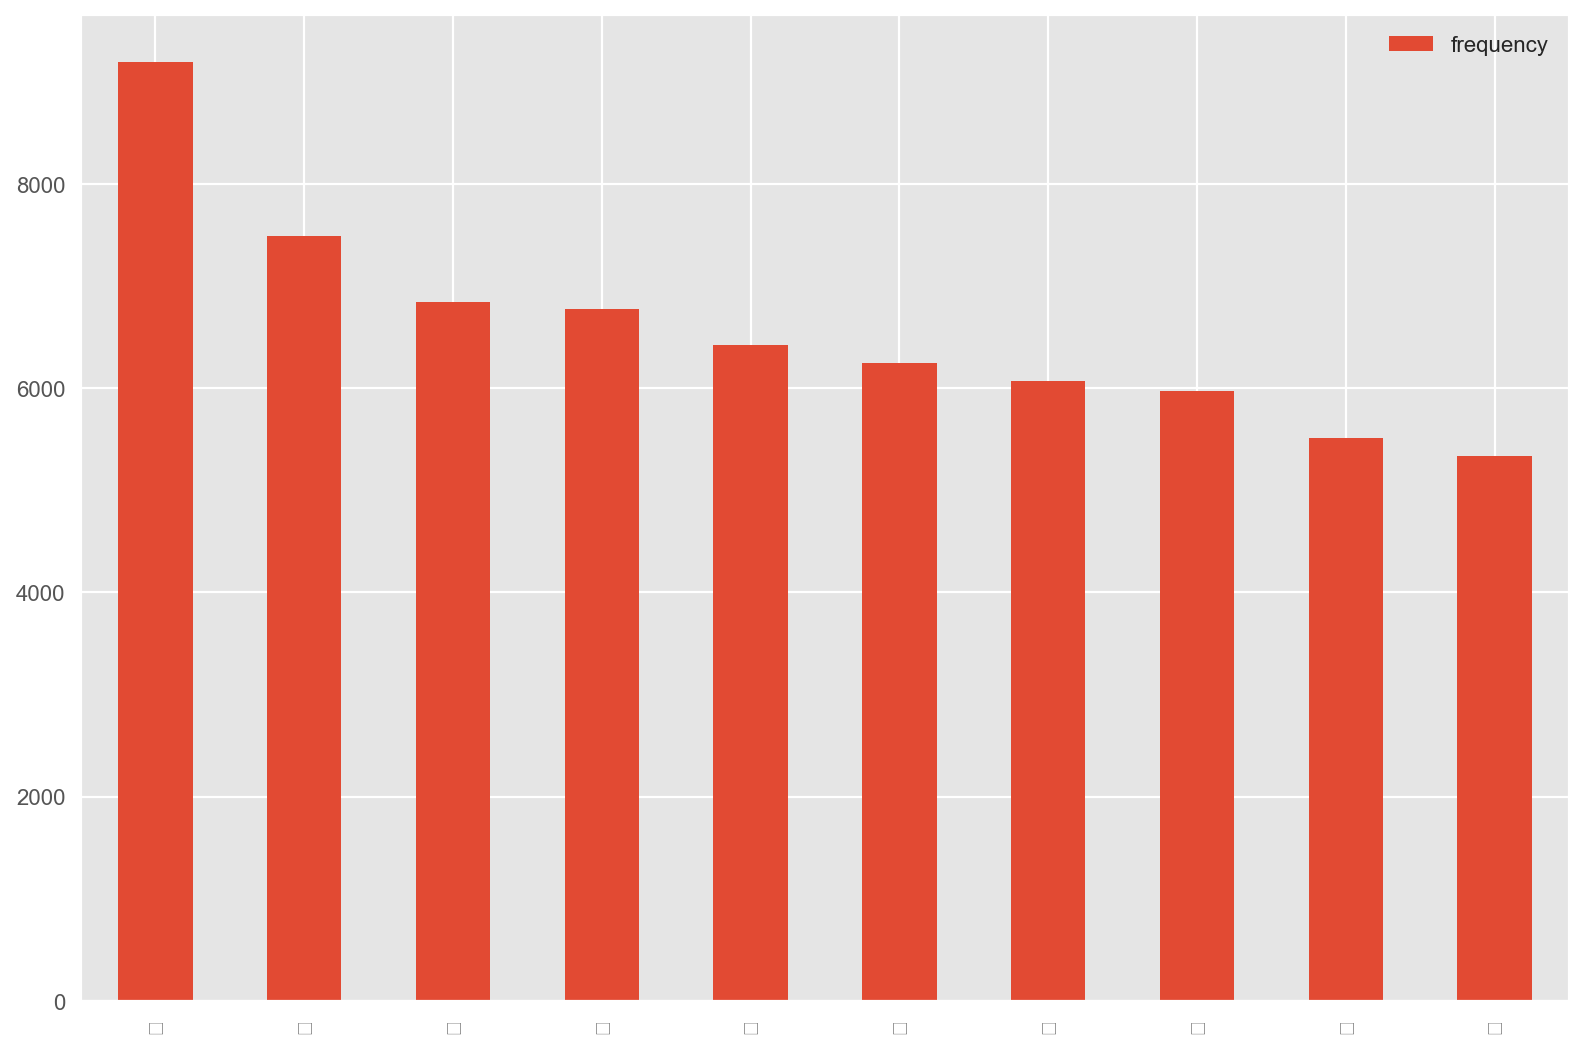

In [62]:
vcdf.head(10).plot.bar(figsize=(12, 8))

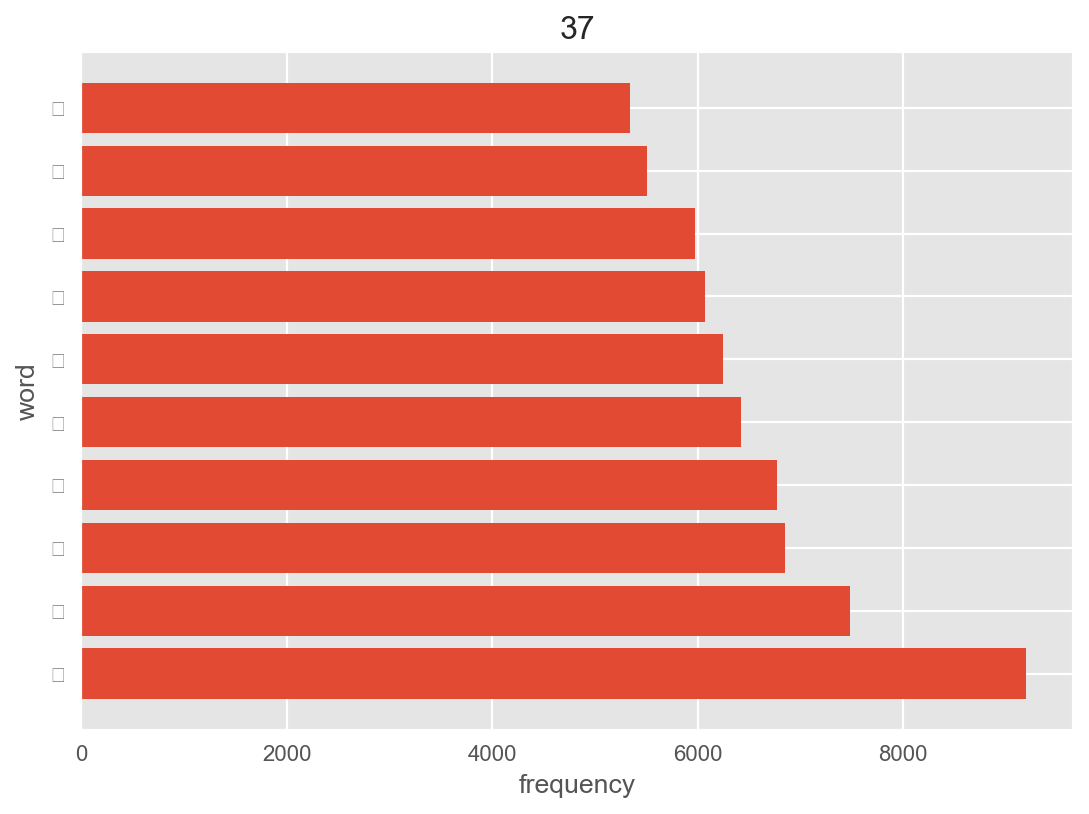

In [4]:
import numpy as np
from q30 import read_mecab
import matplotlib.pyplot as plt
from collections import Counter

word = []
count = []
word_freq = Counter(word['base'] for sent_lis in read_mecab(open('neko.txt.mecab')) 
                            for word in sent_lis)
for w, c in word_freq.most_common(10):
    word.append(w)
    count.append(c)

len_word = np.arange(len(word))
plt.barh(len_word, count, align='center')
plt.yticks(len_word, word)
plt.xlabel('frequency')
plt.ylabel('word')
plt.title('37')

- jupyter上だと日本語ラベルが表示されない。 
- jupyterを使わないとこんな感じ

![37](http://www.cl.ecei.tohoku.ac.jp/~asano/nlp100/figure_1.png)

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

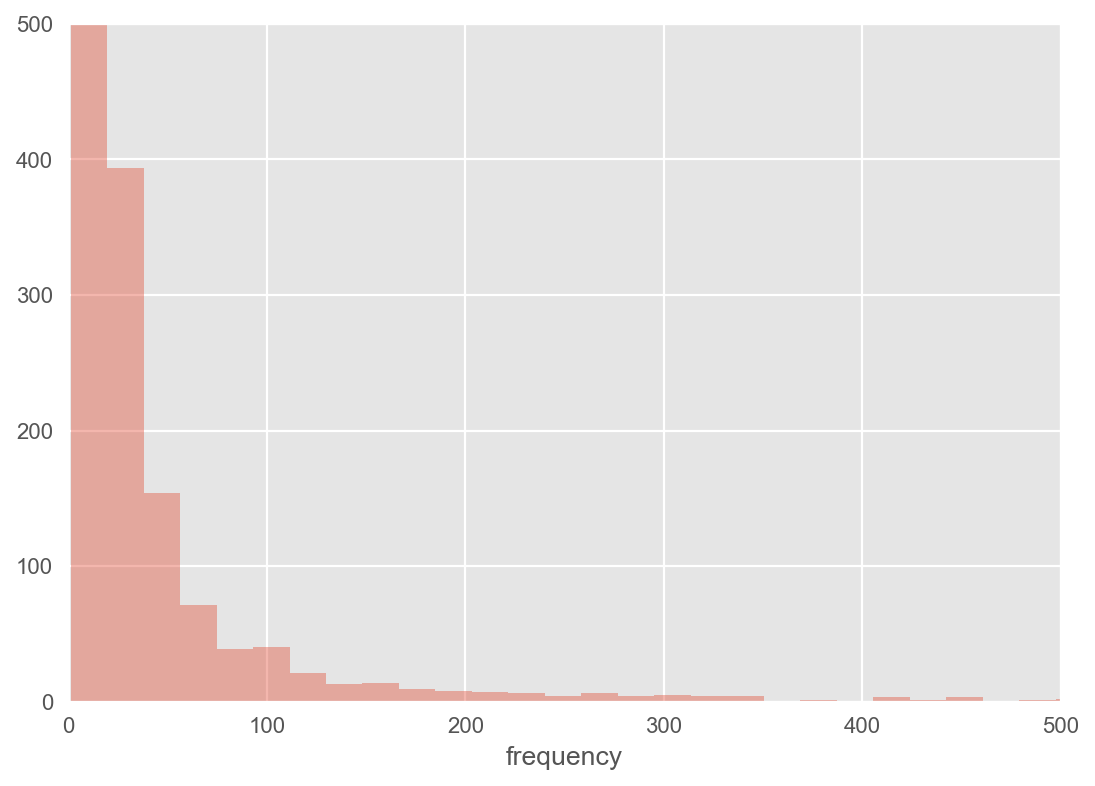

In [63]:
hist = sns.distplot(vcdf.frequency,kde=False, bins=500)
hist.set(ylim=(0, 500))
hist.set(xlim=(0, 500))
hist

(1, 30)

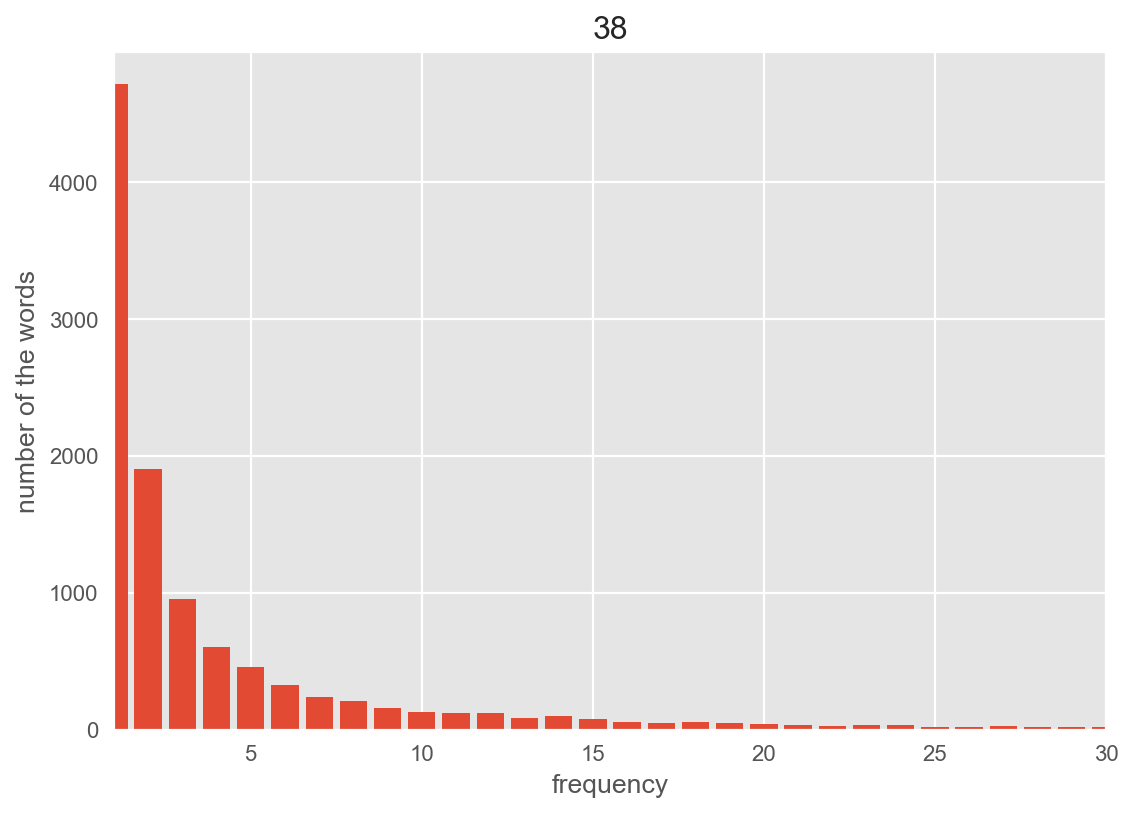

In [5]:
word_freq = Counter(word['base'] for sent_lis in read_mecab(open('neko.txt.mecab')) 
                        for word in sent_lis)
data = Counter(count for count in word_freq.values())

x = []
y = []
for w, c in Counter(data).items():
    x.append(w)
    y.append(c)

plt.bar(x, y)
plt.title("38")
plt.xlabel("frequency")
plt.ylabel("number of the words")
plt.xlim(1, 30)

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

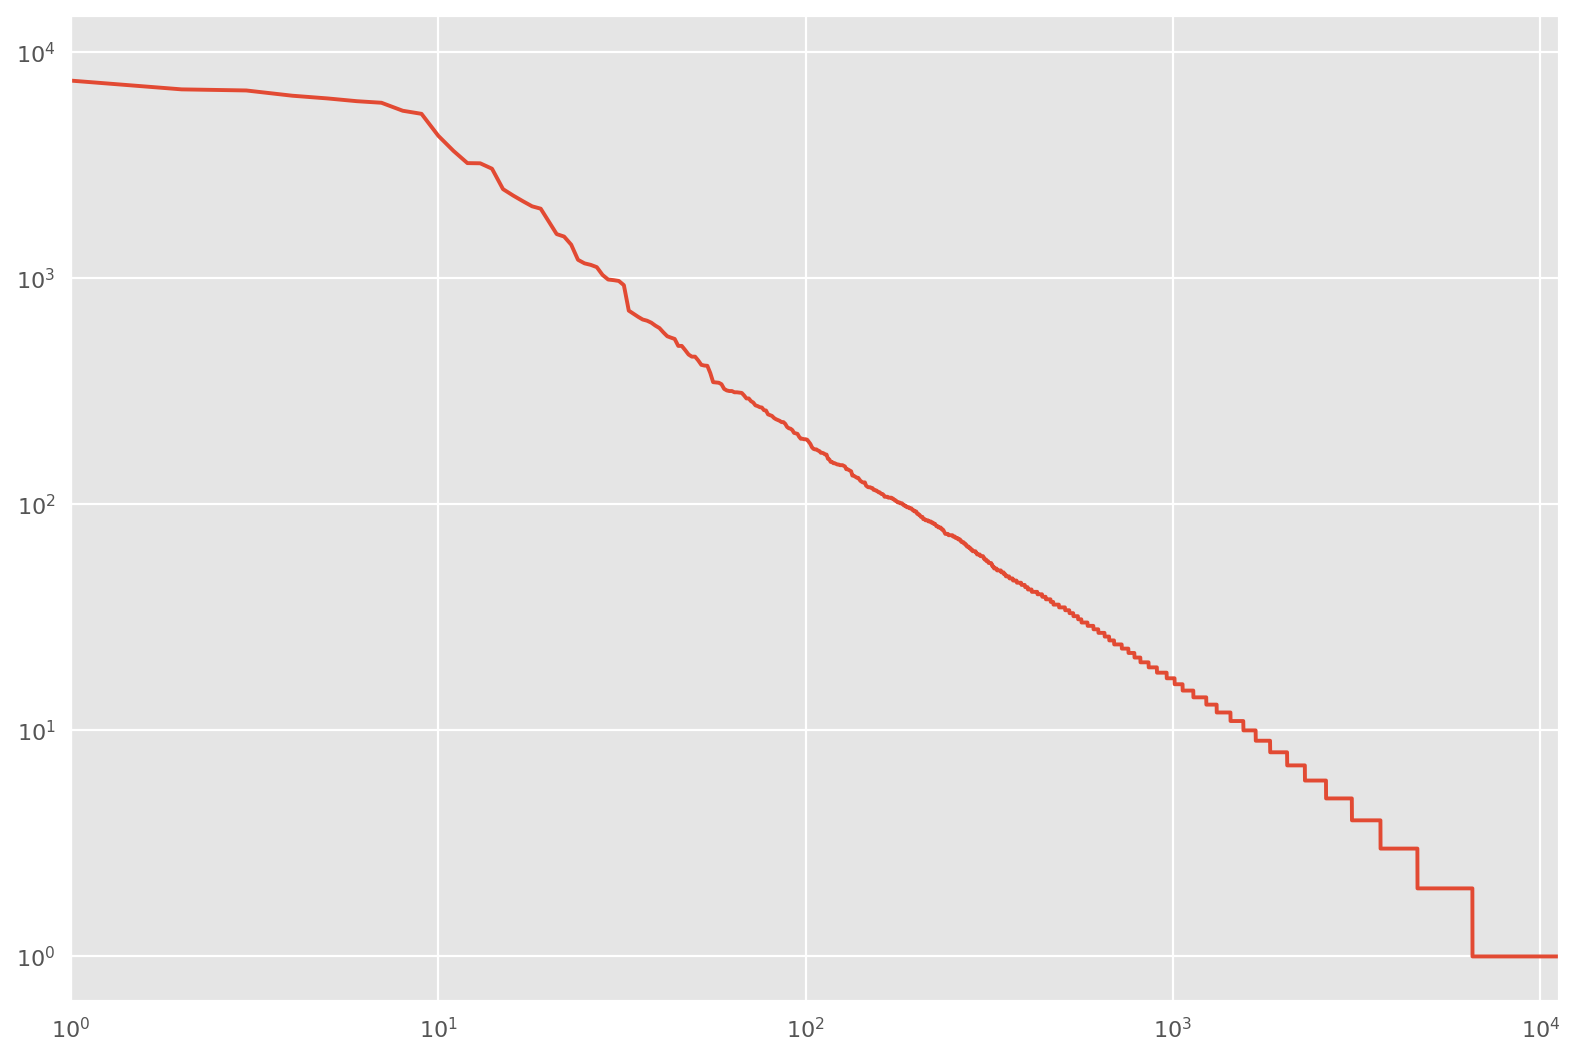

In [64]:
s = pd.Series(vc.values)
s.plot(loglog=True, figsize=(12, 8))

(1, 10000)

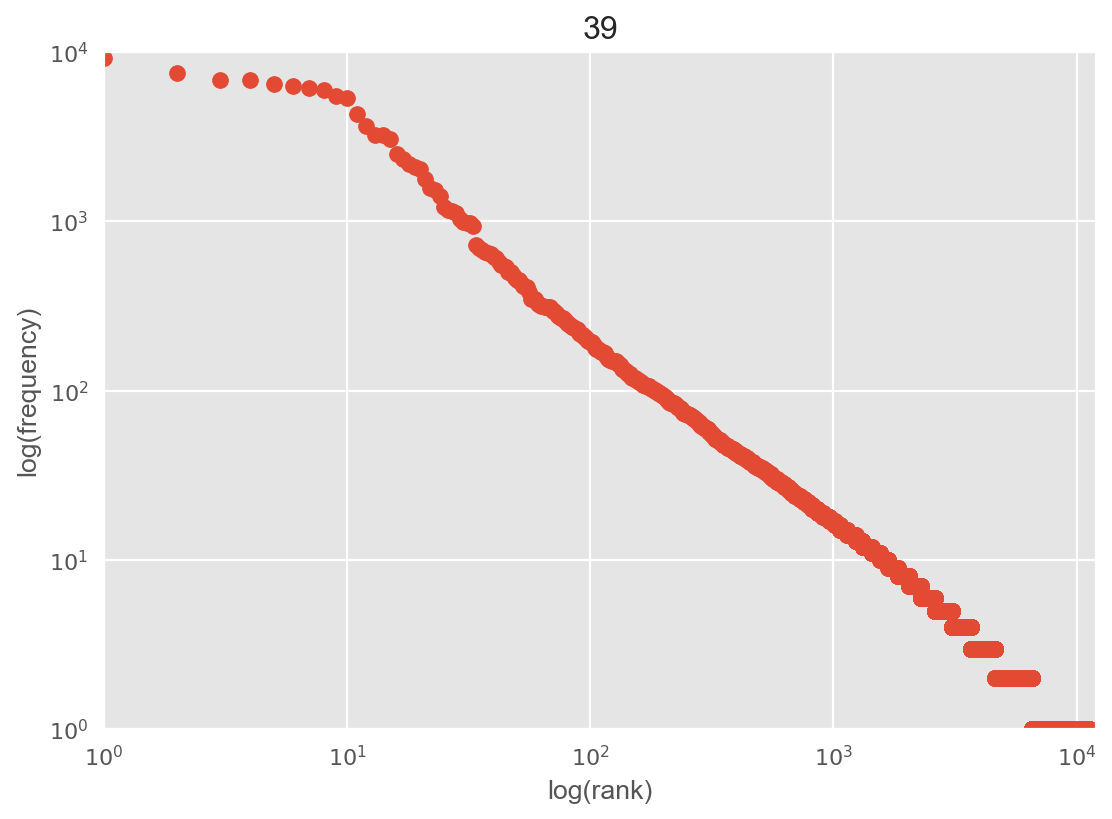

In [6]:
count = [c for _, c in word_freq.most_common()]
plt.scatter(np.arange(1, len(count)+1), count)
plt.yscale("log")
plt.xscale("log")
plt.title("39")
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.xlim(1, 12000)
plt.ylim(1, 10000)